In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl

plt.style.use('PaperDoubleFig.mplstyle.txt')
# Make some style choices for plotting 
colorWheel =['#2bd1e5',
            '#281bf5',
             '#db1bf5',
             '#F5CD1B',
            '#FF5733','#9cf51b',]
dashesStyles = [[3,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1],[1000,1],[8,2]]

In [222]:
fileName = '../data/L1.csv'
df = pd.read_csv(fileName)
std = df.groupby(['NumGroups', 'variable']).std().reset_index()
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')

        Unnamed: 0  NumGroups variable      value
0                0          1  Dynamic   0.000000
1                1          1  Dynamic   0.000000
2                2          1  Dynamic   0.000000
3                3          1  Dynamic   0.000000
4                4          1  Dynamic   0.000000
...            ...        ...      ...        ...
499995      499995       1000   Greedy   0.000000
499996      499996       1000   Greedy  15.874016
499997      499997       1000   Greedy  15.905512
499998      499998       1000   Greedy   4.000000
499999      499999       1000   Greedy   0.000000

[500000 rows x 4 columns]
     NumGroups   variable   Unnamed: 0      value
0            1      Bayes  2886.895680   0.000000
1            1    Dynamic  2886.895680   0.000000
2            1     Greedy  2886.895680   0.000000
3            1  Threshold  2886.895680   0.000000
4            1    Weights  2886.895680   0.000000
..         ...        ...          ...        ...
370       1000      Bay

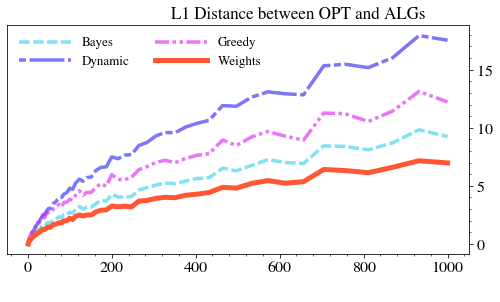

In [209]:
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    if(alg=='Weights'):
        alphaVal = 1.
        linethick=5
        ax.plot(df[alg].index,
                    df[alg],
                    color=colorWheel[j%len(colorWheel)],
                    linestyle = '-',
                    lw=linethick,
                    label=alg,
                    alpha=alphaVal)
    elif alg!='Threshold':
        alphaVal = 0.6
        linethick = 3.5 
        ax.plot(df[alg].index,
                    df[alg],
                    color=colorWheel[j%len(colorWheel)],
                    linestyle = '-',
                    dashes=dashesStyles[j%len(dashesStyles)],
                    lw=linethick,
                    label=alg,
                    alpha=alphaVal)
#ax.set_xlabel('Number of Towns')
ax.set_xlabel(' ')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.yaxis.set_label_coords(0.63,1.01)
ax.yaxis.tick_right()
nameOfPlot = 'L1 Distance between OPT and ALGs'
plt.ylabel(nameOfPlot,rotation=0)
ax.legend(frameon=False, loc='upper left',ncol=2,handlelength=4)
plt.savefig(('L1.pdf'),dpi=300)
plt.show()

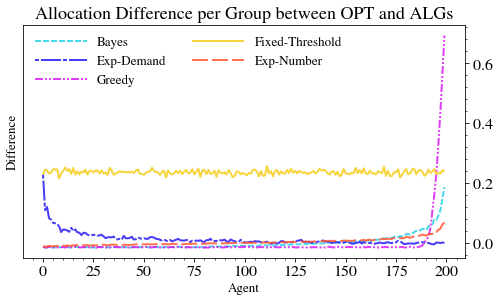

In [3]:
fileName = '../data/GroupAllocationDifference.csv'
df = pd.read_csv(fileName)
df = df.groupby(['Group', 'variable']).mean().reset_index()
df = df.pivot(index='Group',columns='variable',values = 'value')
df = df.rename(columns = {'Threshold': 'Fixed-Threshold', 'Weights':'Exp-Number', 'Dynamic':'Exp-Demand'})
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 0.85
    linethick = 2 
    ax.plot(df[alg].index,
                df[alg],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Group',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.yaxis.tick_right()
#ax.yaxis.set_label_coords(1.12,0.5)
ax.set_ylabel('Difference',fontsize=13)
ax.set_xlabel('Agent')
nameOfPlot = 'Allocation Difference per Group between OPT and ALGs'
plt.title(nameOfPlot,fontsize=18)
ax.legend(frameon=False, loc='upper left',ncol=2,handlelength=4)
plt.savefig(('GroupAllocationDifference.pdf'),dpi=300)
plt.show()

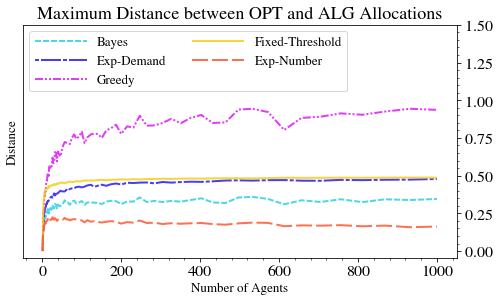

In [7]:
fileName = '../data/L-Inf.csv'
df = pd.read_csv(fileName)
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')
df = df.rename(columns = {'Threshold': 'Fixed-Threshold', 'Weights':'Exp-Number', 'Dynamic':'Exp-Demand'})
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 0.85
    linethick = 2 
    ax.plot(df[alg].index,
                df[alg],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Number of Agents',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.yaxis.tick_right()
#ax.yaxis.set_label_coords(1.12,0.5)
ax.set_ylabel('Distance',fontsize=13)
nameOfPlot = 'Maximum Distance between OPT and ALG Allocations'
plt.title(nameOfPlot,fontsize=18)
plt.gca().set_ylim(top=1.5)
ax.legend(frameon=True, loc='upper left',ncol=2,handlelength=4)
plt.savefig(('LInf.pdf'),dpi=300)
plt.show()

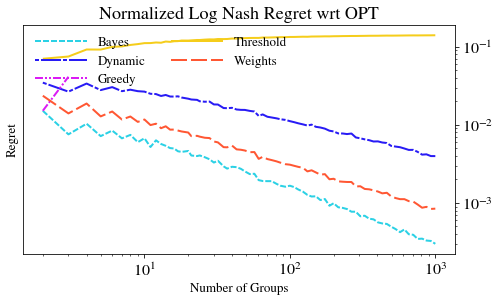

In [215]:
fileName = '../data/LogNashNormal.csv'
df = pd.read_csv(fileName)
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 1
    linethick = 2
    ax.plot(df[alg].index[1:],
                df[alg][1:],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Number of Agents',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.yaxis.tick_right()
ax.set_ylabel('Regret',fontsize=13)
nameOfPlot = 'Normalized Log Nash Regret wrt OPT'
plt.title(nameOfPlot,fontsize=18)
ax.legend(frameon=False, loc='upper left',ncol=2,handlelength=4)
plt.loglog()
plt.savefig(('NormalizedLogRegret.pdf'),dpi=300)
plt.show()

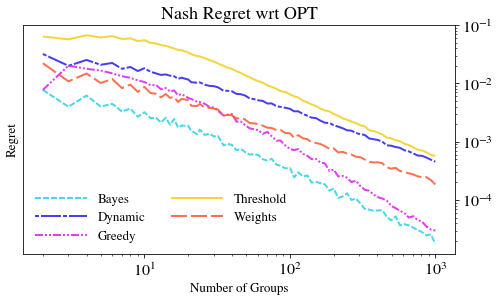

In [212]:
fileName = '../data/Nash.csv'
df = pd.read_csv(fileName)
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 0.85
    linethick = 2 
    ax.plot(df[alg].index[1:],
                df[alg][1:],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Number of Groups',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.yaxis.tick_right()
ax.set_ylabel('Regret',fontsize=13)
nameOfPlot = 'Nash Regret wrt OPT'
plt.title(nameOfPlot,fontsize=18)
ax.legend(frameon=False, loc='lower left',ncol=2,handlelength=4)
plt.loglog()
plt.savefig(('NashRegret.pdf'),dpi=300)
plt.show()

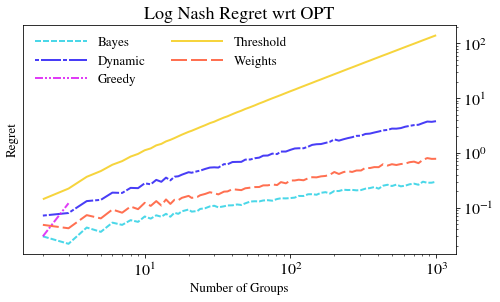

In [217]:
fileName = '../data/LogNash.csv'
df = pd.read_csv(fileName)
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 0.85
    linethick = 2 
    ax.plot(df[alg].index[1:],
                df[alg][1:],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Number of Groups',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.yaxis.tick_right()
ax.set_ylabel('Regret',fontsize=13)
nameOfPlot = 'Log Nash Regret wrt OPT'
plt.title(nameOfPlot,fontsize=18)
ax.legend(frameon=False, loc='upper left',ncol=2,handlelength=4)
plt.loglog()
plt.savefig(('LogRegret.pdf'),dpi=300)
plt.show()

In [12]:
fileName = '../data/GroupAllocationDifference.csv'
df = pd.read_csv(fileName)
#df = df.groupby(['Group', 'variable']).mean().reset_index()
#df = df.pivot(index='Group',columns='variable',values = 'value')
#df = df.rename(columns = {'Threshold': 'Fixed-Threshold', 'Weights':'Exp-Number', 'Dynamic':'Exp-Demand'})
df

,Unnamed: 0,Group,variable,value
0,0,0,Dynamic,0.237410
1,1,1,Dynamic,0.109596
2,2,2,Dynamic,0.113222
3,3,3,Dynamic,0.080481
4,4,4,Dynamic,0.074923
...,...,...,...,...
995,995,195,Greedy,0.255753
996,996,196,Greedy,0.338612
997,997,197,Greedy,0.434639
998,998,198,Greedy,0.562386
